In [1]:
%matplotlib inline
%load_ext memory_profiler

import os 
import glob 
import sys
sys.path.append('/home/ngr4/project/edge_feat/scripts')
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
import utils
import load_data as data
import math
import numpy as np
import pandas as pd
import seaborn as sns
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
import graphtools as gt
import phate
import umap
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import scanpy as sc
from scipy import sparse
import scprep
import time
import datetime
from scipy.stats import zscore
from adjustText import adjust_text

plt.rc('font', size = 8)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['legend.frameon']=False
sns.set_style("ticks")

In [6]:
savefigs = True

# save the output
pfp = '/home/ngr4/project/edge_feat/results'
imp = pd.read_csv(os.path.join(pfp, 'node_feat_mask_Tcell_in_severe_cluster.csv'))
imp['rand_pos'] = np.random.uniform(size=(imp.shape[0],))
imp = imp.sort_values(by='node_feat_mask', ascending=False) # sort values
imp.index = list(range(imp.shape[0])) # reindex to be able to use .loc

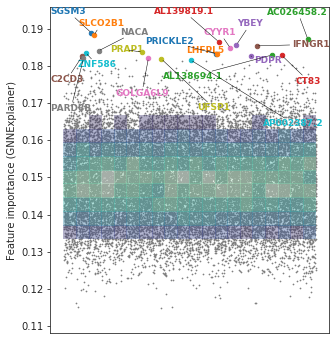

In [20]:
fig, ax = plt.subplots(1,1, figsize=(5,6))
sns.scatterplot(x='rand_pos',
                y='node_feat_mask',
               data=imp, color='gray',
               linewidth=0, s=3,
               rasterized=True,
               ax=ax)
sns.histplot(x='rand_pos', 
             y='node_feat_mask', 
             data=imp,
             bins=20, 
             pthresh=.1, 
             cmap="mako",
             alpha=0.4,
            ax=ax)
ax.set_xticks([])
ax.set_xlabel('')
ax.set_ylabel('Feature importance (GNNExplainer)')
ax.set_title('')

ntop = 20
[ax.scatter(imp.loc[i, 'rand_pos'], imp.loc[i, 'node_feat_mask'], s=20, color=sns.color_palette()[(i-10) % 10]) for i in range(ntop)]
# texts = [ax.text(imp.loc[i, 'rand_pos'], imp.loc[i, 'node_feat_mask'], imp.loc[i, 'Gene'], fontsize=9, bbox=dict(facecolor='white',edgecolor='black')) for i in range(ntop)]
texts = [ax.text(imp.loc[i, 'rand_pos'], imp.loc[i, 'node_feat_mask'], imp.loc[i, 'Gene'], fontsize=9, color=sns.color_palette()[(i-10) % 10], weight='bold') for i in range(ntop)]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5), expand_text=(1.7,1.7)) # increase expand_text for more space

if savefigs:
    fig.savefig(os.path.join(pfp, 'node_feat_mask_scatter_feat_imp_Tcells_severe_cluster.pdf'), bbox_inches='tight')

In [28]:
# to gene ontology
for i in imp.loc[0:20, 'Gene'].to_list():
    print(i)

SGSM3
SLCO2B1
AC026458.2
AL139819.1
YBEY
IFNGR1
CYYR1
NACA
PRAP1
ZNF586
PRICKLE2
LHFPL5
AL138694.1
CT83
PDPR
C2CD3
GOLGA6L9
PARD6B
UFSP1
AP002387.2
SGF29
